# Matching

### a. Install packages and read in data

In [ ]:
# install.packages(c('Matching', 'rgenoud', 'ggplot2', 'cobalt'))

library(Matching)
library(rgenoud)
library(ggplot2)
library(cobalt)

Loading required package: MASS

## 
##  Matching (Version 4.10-2, Build Date: 2022-04-13)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##


##  rgenoud (Version 5.9-0.3, Build Date: 2022-04-19)
##  See http://sekhon.berkeley.edu/rgenoud for additional documentation.
##  Please cite software as:
##   Walter Mebane, Jr. and Jasjeet S. Sekhon. 2011.
##   ``Genetic Optimization Using Derivatives: The rgenoud package for R.''
##   Journal of Statistical Software, 42(11): 1-26. 
##


 cobalt (Version 4.3.2, Build Date: 2022-01-19)



In [ ]:
df = read.csv('/work/DS4SG-Gender-Inequality/data/processed/skills_certifications_categorized_female_treatment.csv')
head(df)

,search_query,name,gender,join_date_from_earliest,location_size,hourly_rate,pay_grade,avg_rating,num_reviews,num_recommendations,⋯,management_skills,marketing_business_skills,performance_arts_skills,design_skills,teaching_training_skills,miscellaneous_skills,language_certifications,freelancer_certifications,general_skill_certifications,programming_certifications
,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,2,Milen,0,7063,1,45,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,2,Jeremy,0,7526,1,90,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
3,2,Nichole,1,6430,0,25,4,5,2,0,⋯,0,0,0,5,0,0,1,0,0,0
4,2,Robert,0,3238,1,75,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
5,2,Jean-Paul,0,6661,5,19,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,2,Brianna,1,6272,1,10,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


### b. Randomly sample 1000 data points for testing

In [ ]:
# sample = df[sample(nrow(df), 1000), ]
# head(sample)

### c. Match on variables of interest &amp; calculate treatment effect

In [ ]:
attach(df)

# variables to match on
X <- cbind(join_date_from_earliest, location_size, avg_rating, num_reviews, num_recommendations, pct_jobs_completed, pct_on_budget, pct_on_time, verification_preferred_freelancer, verification_identity_verified, verification_payment_verified, verification_phone_verified, verification_email_verified, verification_facebook_connected, badge_plus_membership, badge_preferred_freelancer, badge_verified, engineering_skills, writing_skills, technical_programming_skills, language_translation_skills, finance_accounting_skills, management_skills, marketing_business_skills, performance_arts_skills, design_skills, teaching_training_skills, miscellaneous_skills, language_certifications, freelancer_certifications, general_skill_certifications, programming_certifications)

# find optimal weights with GenMatch
genout <- GenMatch(X=X, Tr=gender, estimand="ATE", M=1, pop.size=64, max.generations=20, wait.generations=4, caliper=0.25)



Thu Apr 21 22:57:07 2022
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 
 0.000000e+00   <=  X11  <=    1.000000e+03 
 0.000000e+00   <=  X12  <=    1.000000e+03 
 0.000000e+00   <=  X13  <=    1.000000e+03 
 0.000000e+00   <=  X14  <=    1.000000e+03 
 0.000000e+00   <=  X15  <=    1.000000e+03 
 0.000000e+00   <=  X16  <=    1.000000e+03 
 0.000000e+00   <=  X17  <=    1.000000e+03 
 0.000000e+00   <=  X18  <=    1.000000e+03 
 0.000000e+00   <=  X19  <=    1.000000e+03 
 0.000000e+00   <=  X20  <=    1.000000e+03 
 0.000000e+00   <=  X21  <=    1.000000e+03 
 0.000000e+00   <= 

In [ ]:
# estimate causal effect using weights
mout <- Match(X=X, Y=hourly_rate, Tr=gender, Weight.matrix=genout)
summary(mout)


Estimate...  -3.6697 
AI SE......  1.3267 
T-stat.....  -2.766 
p.val......  0.0056755 

Original number of observations..............  9766 
Original number of treated obs...............  3074 
Matched number of observations...............  3074 
Matched number of observations  (unweighted).  3503 




Estimate...  -3.5243 
AI SE......  1.3074 
T-stat.....  -2.6957 
p.val......  0.0070244 

Original number of observations..............  9766 
Original number of treated obs...............  3074 
Matched number of observations...............  3074 
Matched number of observations  (unweighted).  3506 



In [ ]:
# check balance on variables of interest
mb <- MatchBalance(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified + engineering_skills + writing_skills + technical_programming_skills + language_translation_skills + finance_accounting_skills + management_skills + marketing_business_skills + performance_arts_skills + design_skills + teaching_training_skills + miscellaneous_skills + language_certifications + freelancer_certifications + general_skill_certifications + programming_certifications, match.out=mout, nboots=1000)


***** (V1) join_date_from_earliest *****
                       Before Matching 	 	 After Matching
mean treatment........     6632.3 	 	     6632.3 
mean control..........     6212.8 	 	       6624 
std mean diff.........     36.976 	 	    0.73301 

mean raw eQQ diff.....     420.52 	 	     11.894 
med  raw eQQ diff.....        402 	 	          5 
max  raw eQQ diff.....       1627 	 	       1203 

mean eCDF diff........   0.086589 	 	  0.0023659 
med  eCDF diff........   0.097927 	 	  0.0017128 
max  eCDF diff........    0.12597 	 	   0.013703 

var ratio (Tr/Co).....    0.59838 	 	    0.99384 
T-test p-value........ < 2.22e-16 	 	    0.15491 
KS Bootstrap p-value.. < 2.22e-16 	 	      0.883 
KS Naive p-value...... < 2.22e-16 	 	    0.89735 
KS Statistic..........    0.12597 	 	   0.013703 


***** (V2) avg_rating *****
                       Before Matching 	 	 After Matching
mean treatment........    0.64493 	 	    0.64493 
mean control..........    0.90109 	 	    0.64805 
std mean 


***** (V1) join_date_from_earliest *****
                       Before Matching 	 	 After Matching
mean treatment........     6632.3 	 	     6632.3 
mean control..........     6212.8 	 	     6624.4 
std mean diff.........     36.976 	 	    0.69903 

mean raw eQQ diff.....     420.52 	 	     14.331 
med  raw eQQ diff.....        402 	 	          6 
max  raw eQQ diff.....       1627 	 	        491 

mean eCDF diff........   0.086589 	 	   0.003286 
med  eCDF diff........   0.097927 	 	  0.0028523 
max  eCDF diff........    0.12597 	 	   0.013406 

var ratio (Tr/Co).....    0.59838 	 	     1.0036 
T-test p-value........ < 2.22e-16 	 	    0.28936 
KS Bootstrap p-value.. < 2.22e-16 	 	      0.894 
KS Naive p-value...... < 2.22e-16 	 	    0.91105 
KS Statistic..........    0.12597 	 	   0.013406 


***** (V2) location_size *****
                       Before Matching 	 	 After Matching
mean treatment........     1.9424 	 	     1.9424 
mean control..........     1.9105 	 	     1.9463 
std me

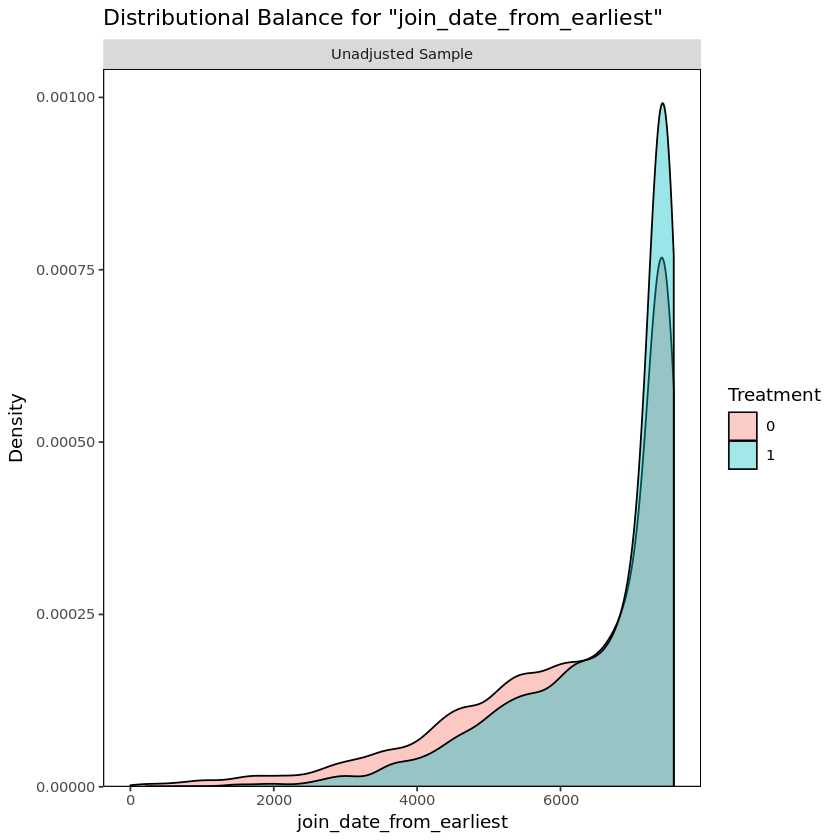

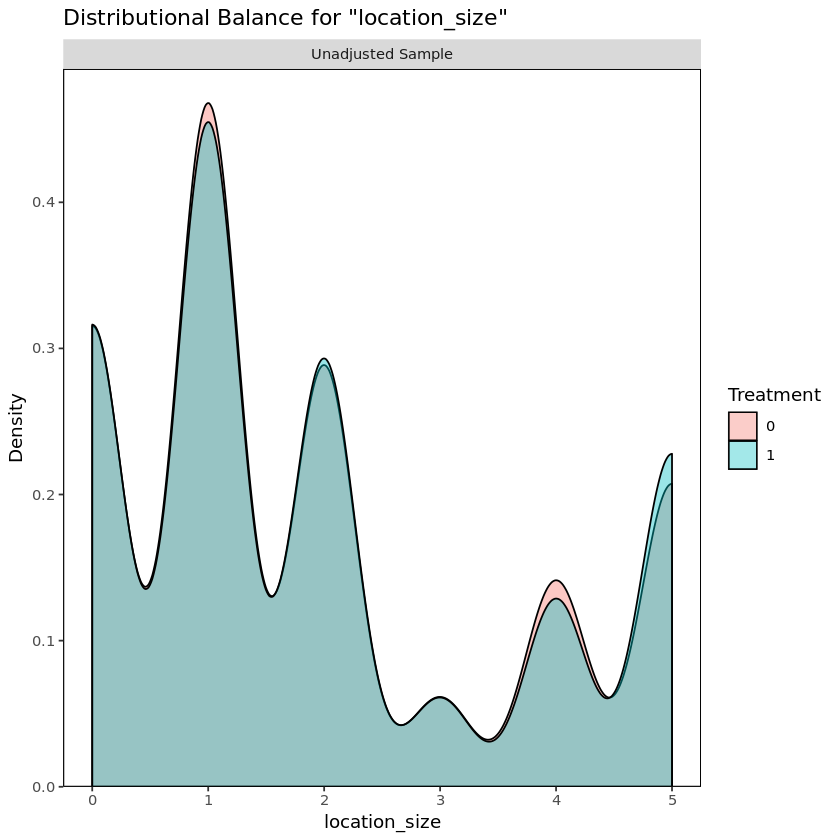

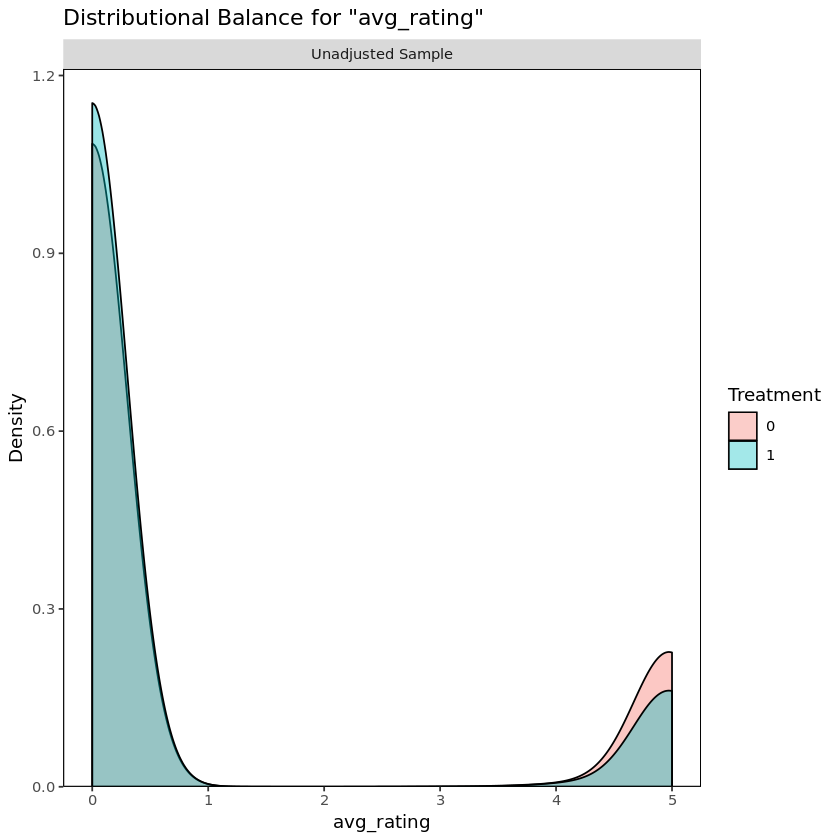

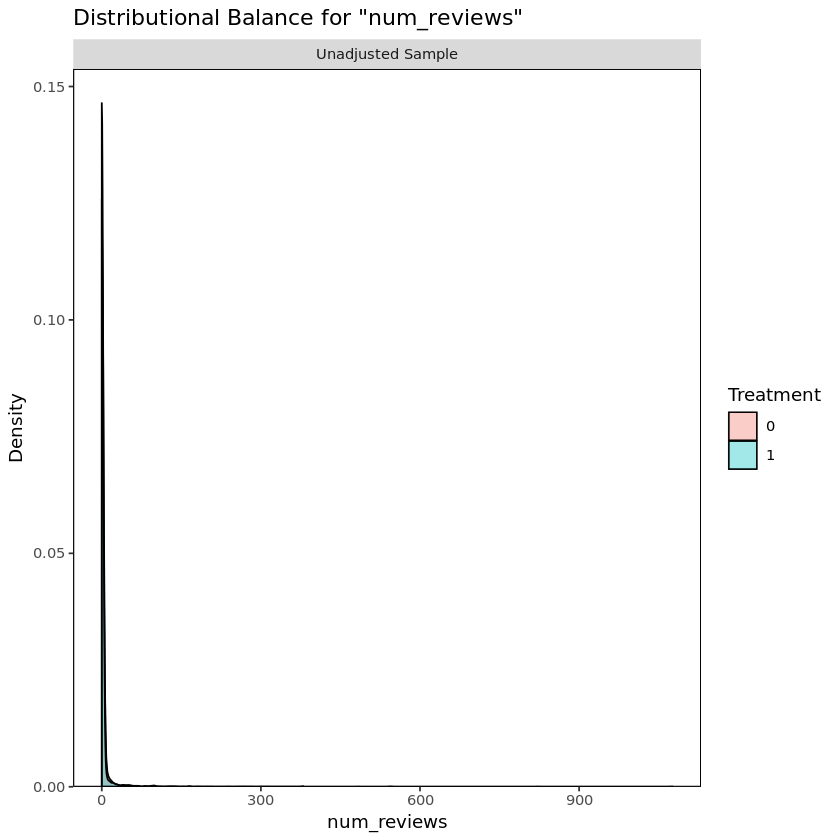

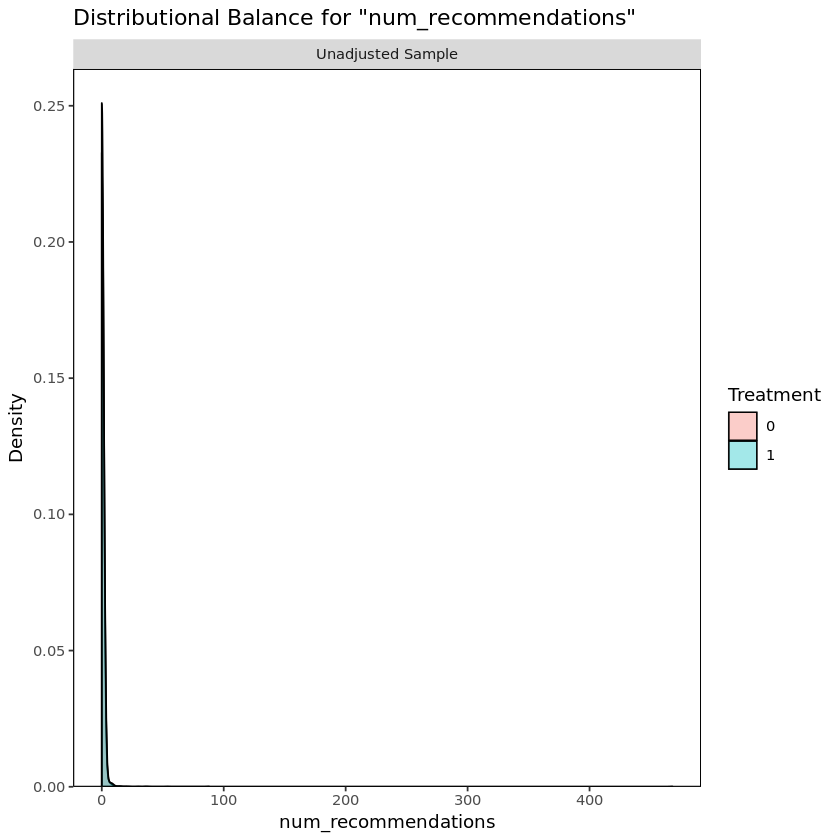

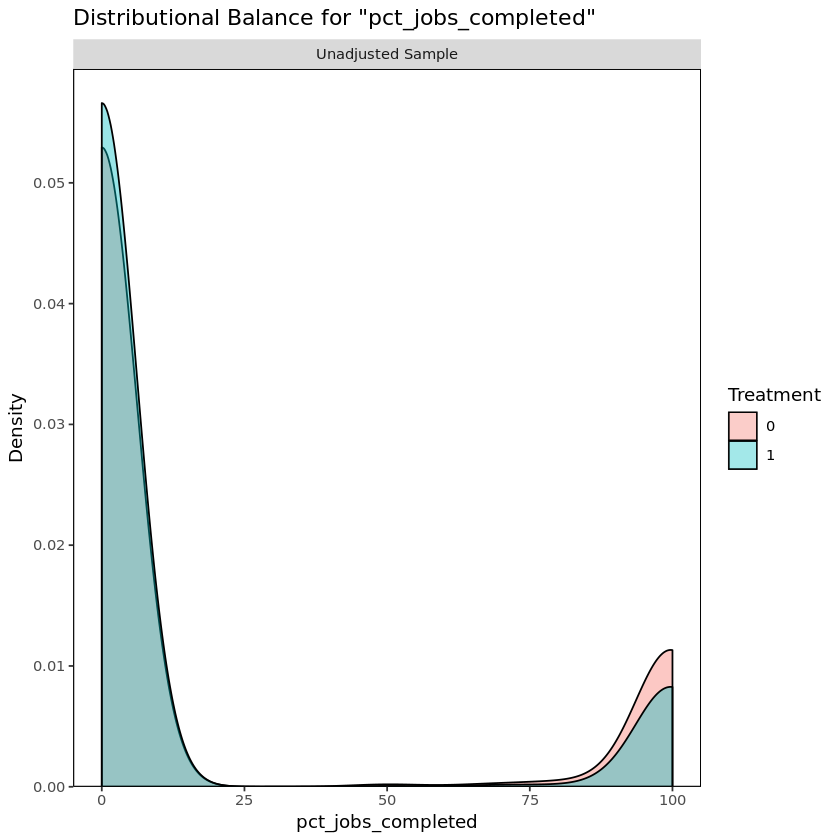

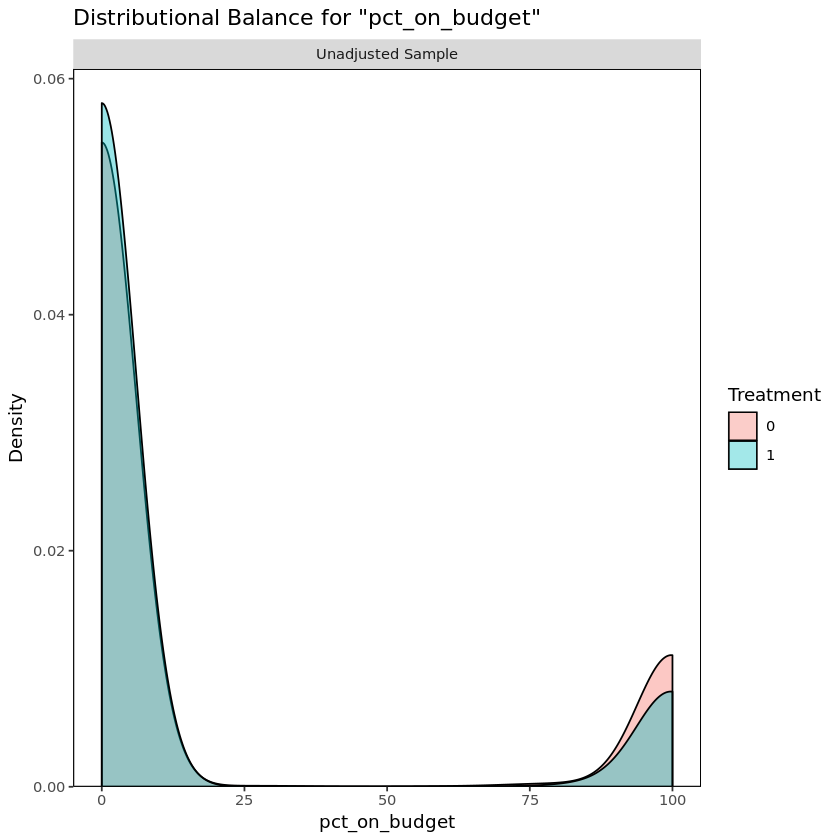

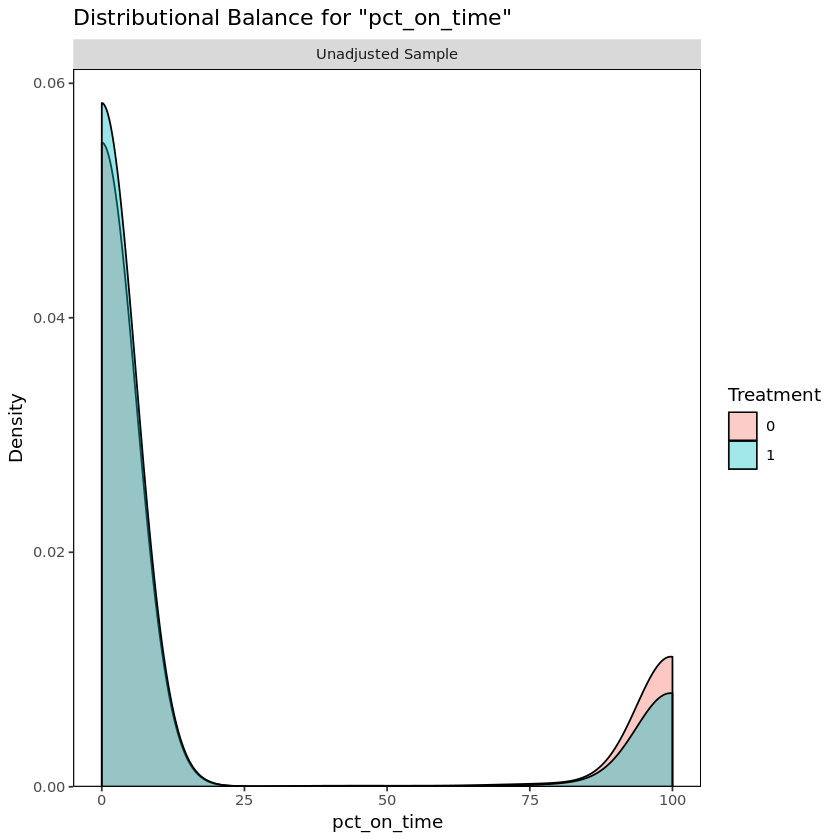

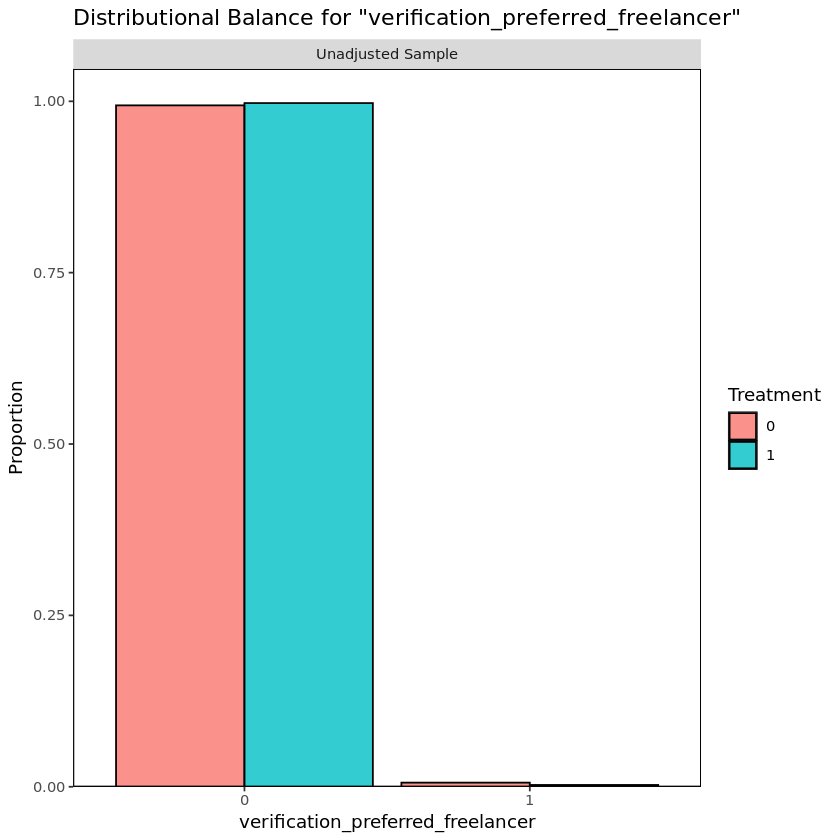

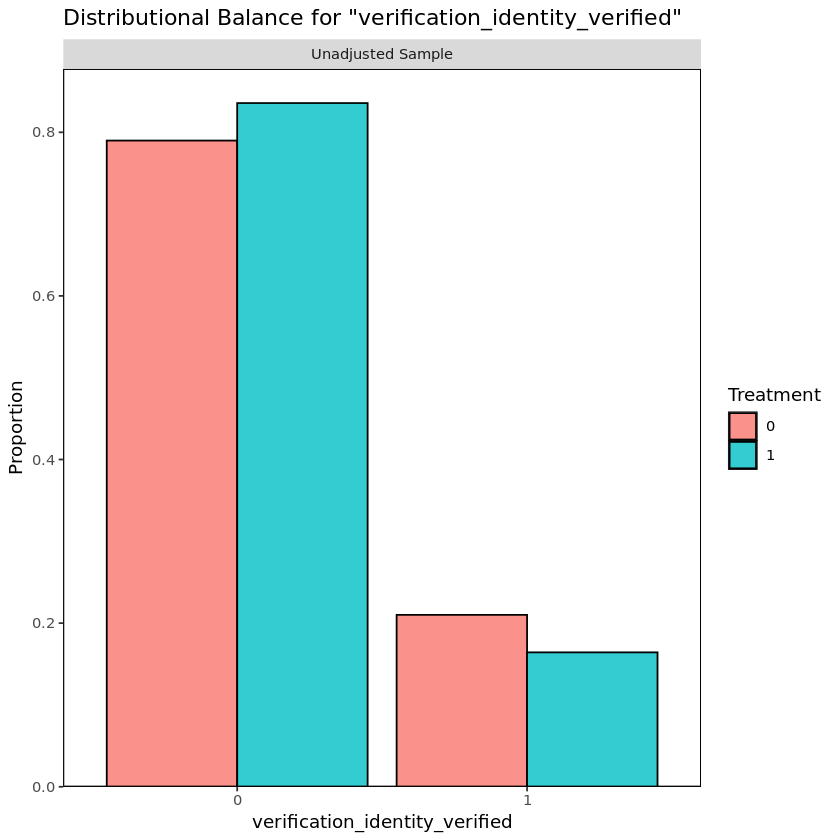

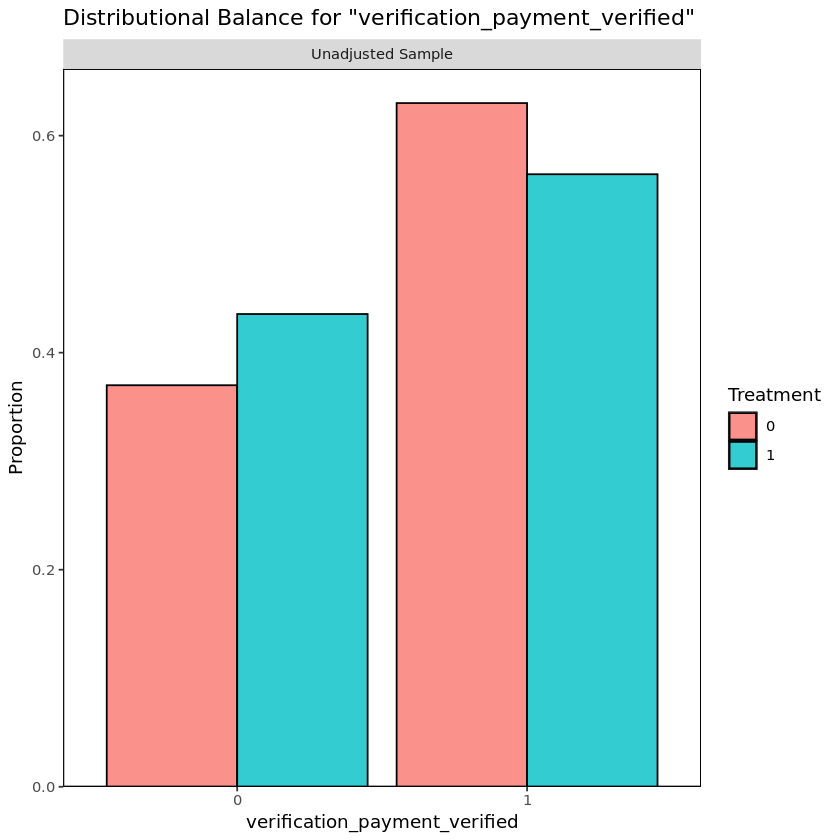

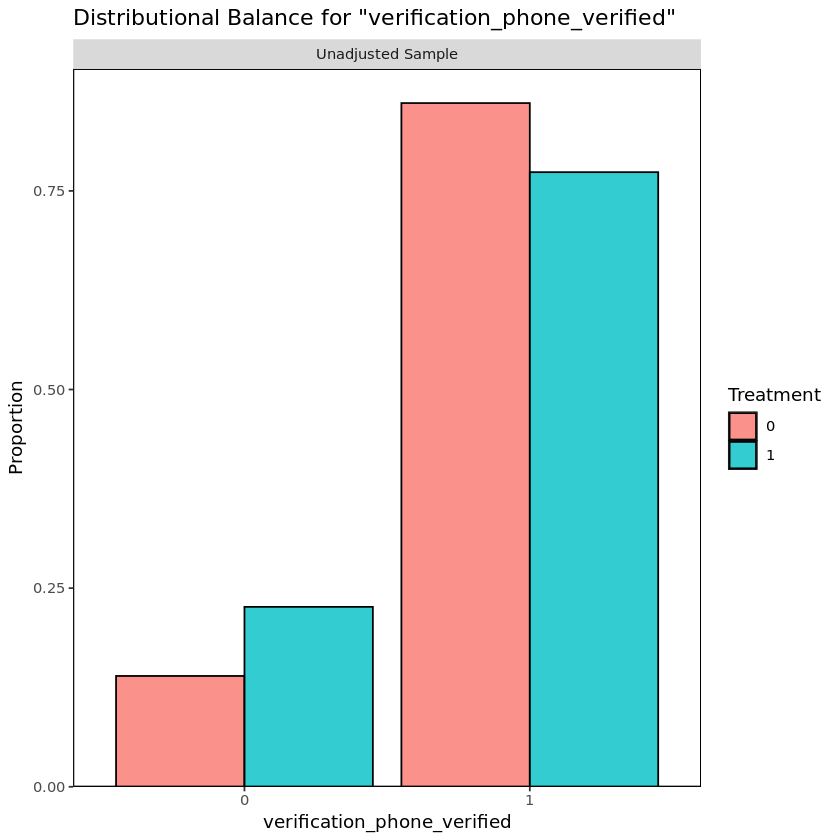

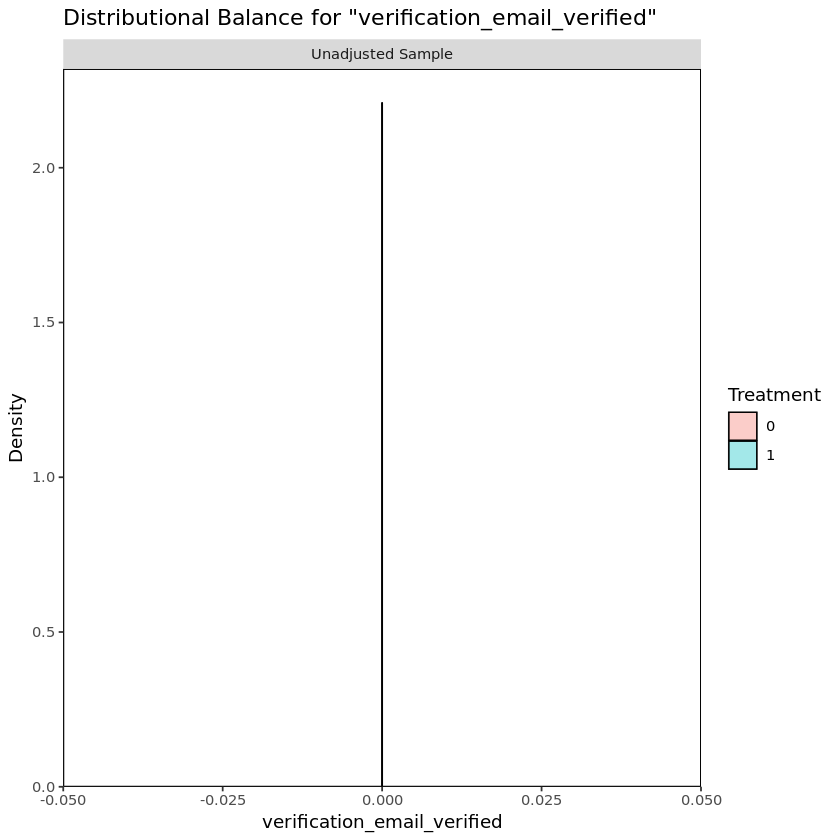

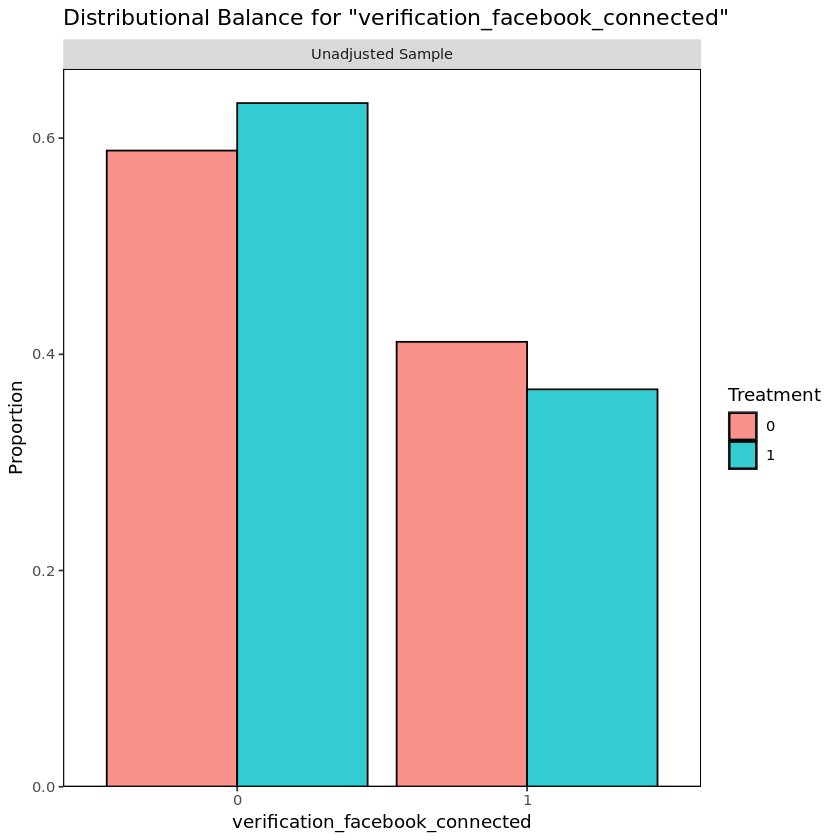

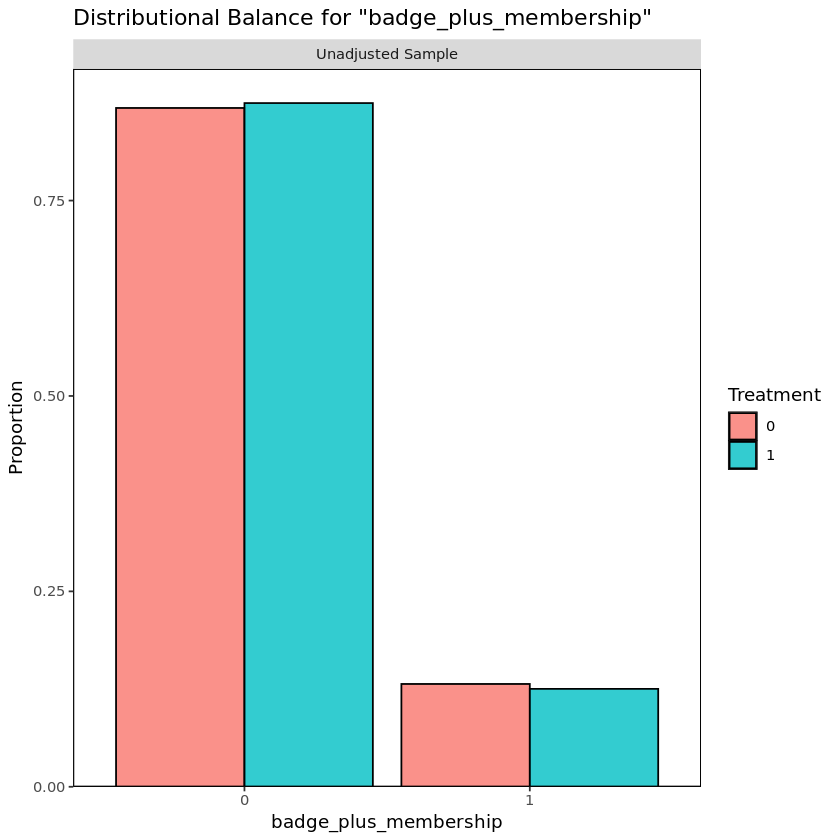

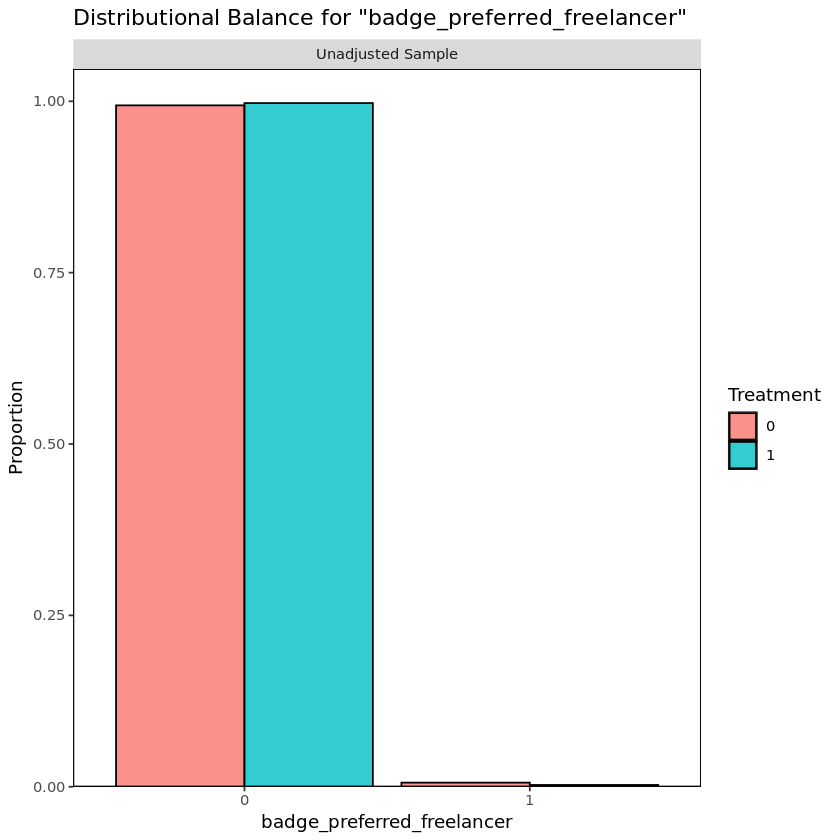

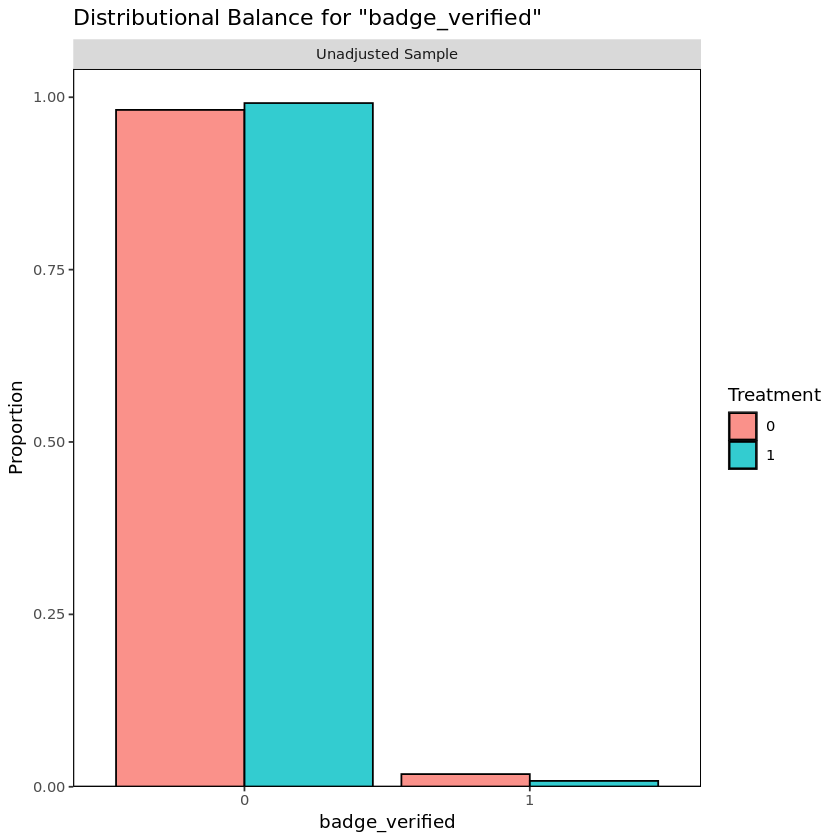

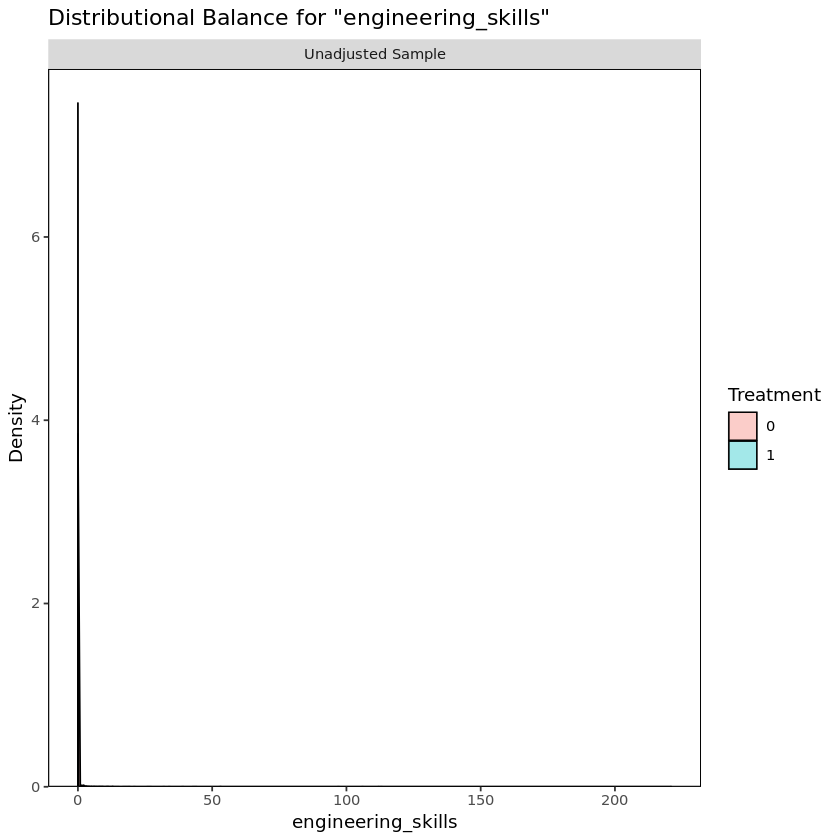

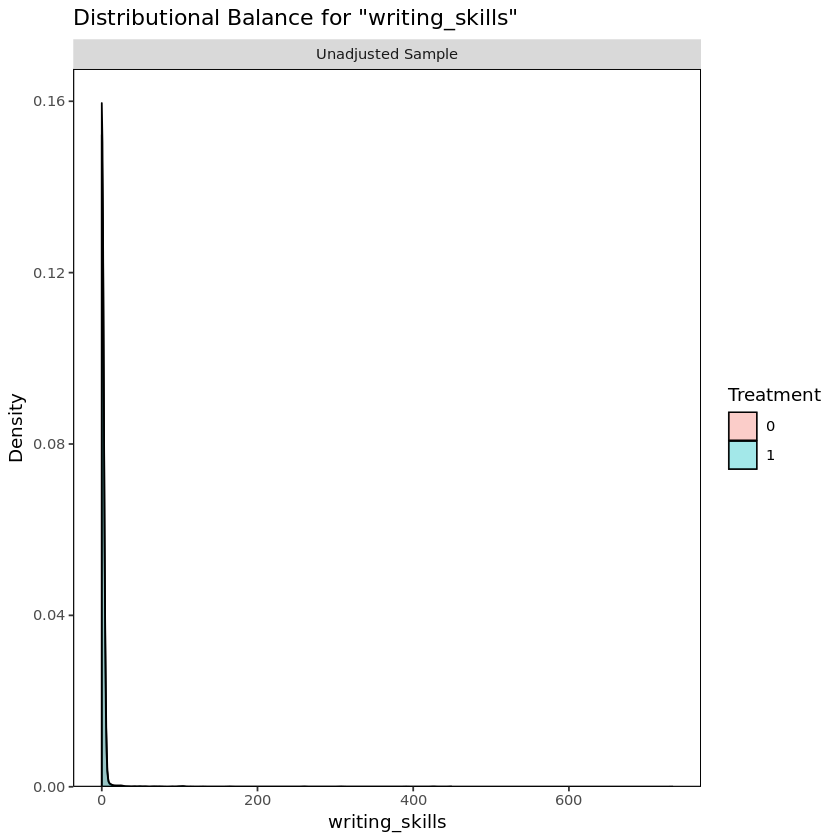

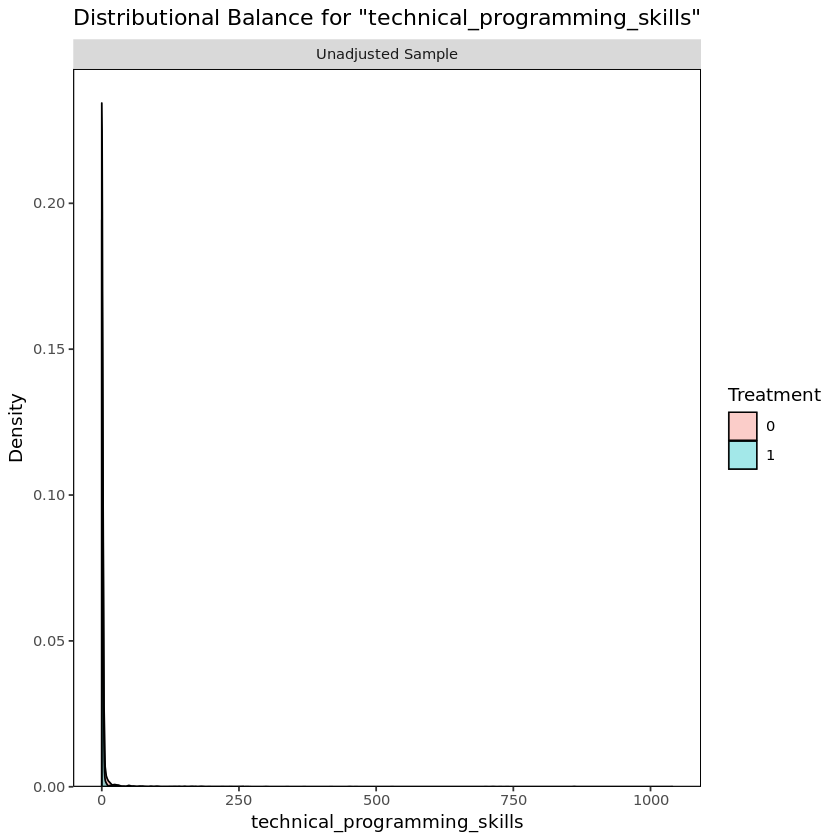

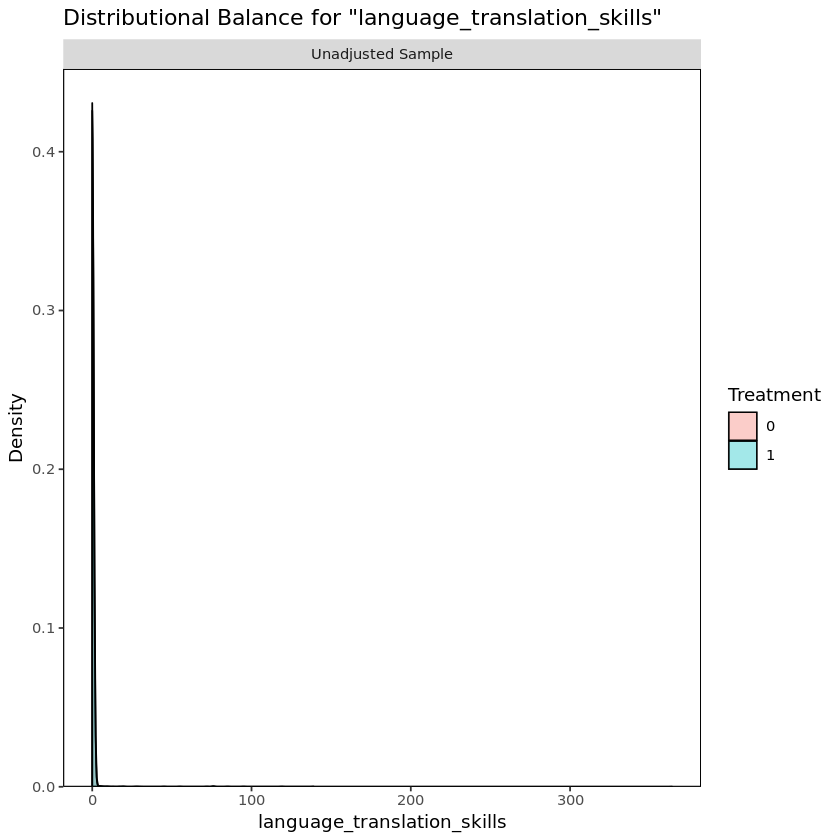

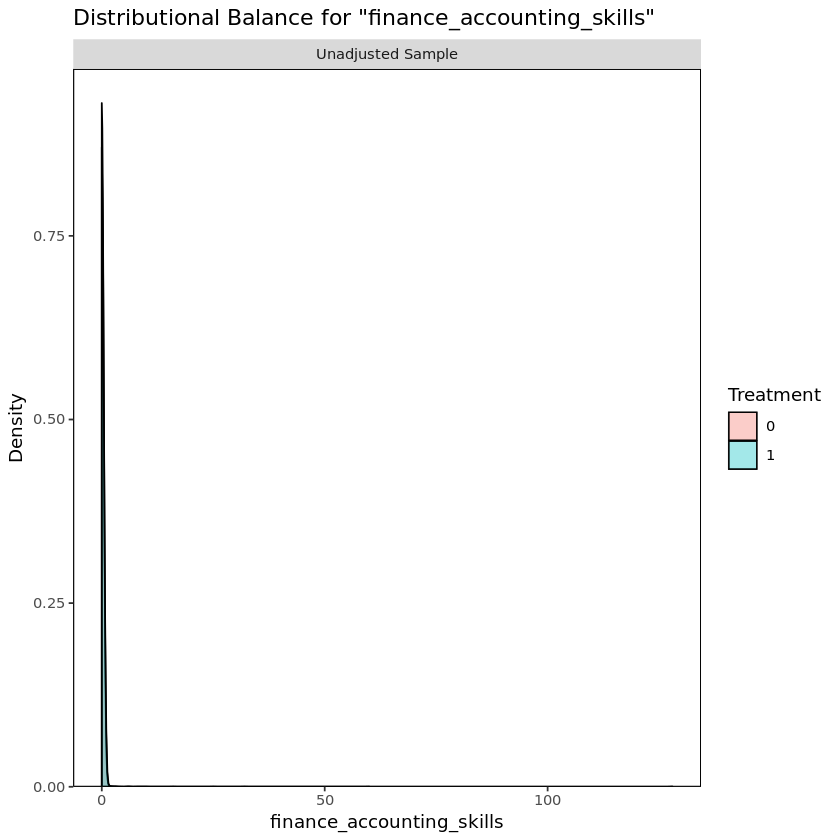

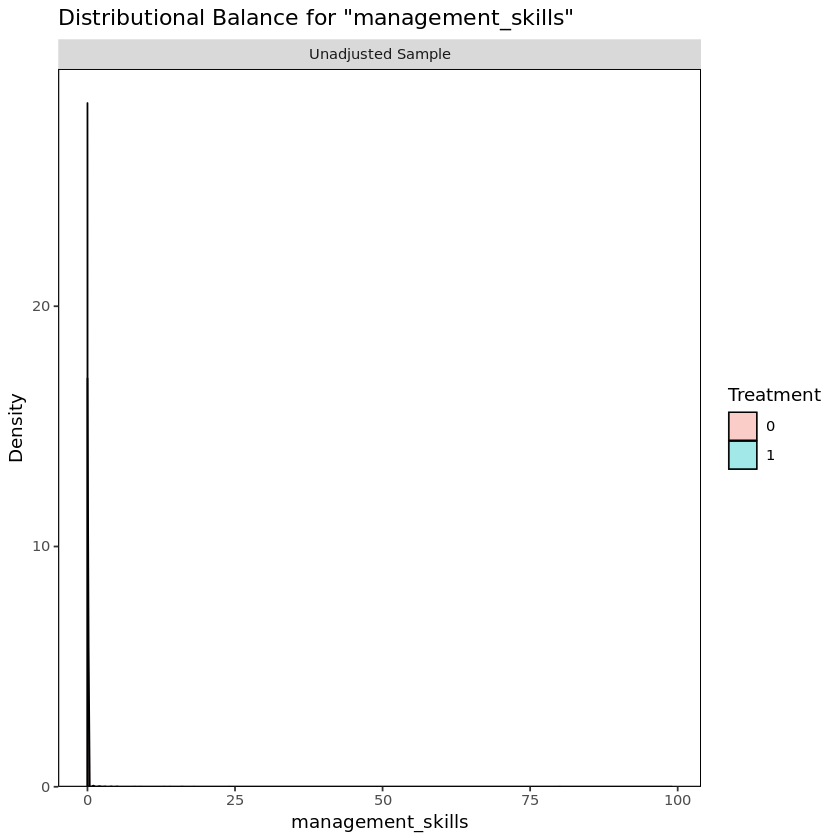

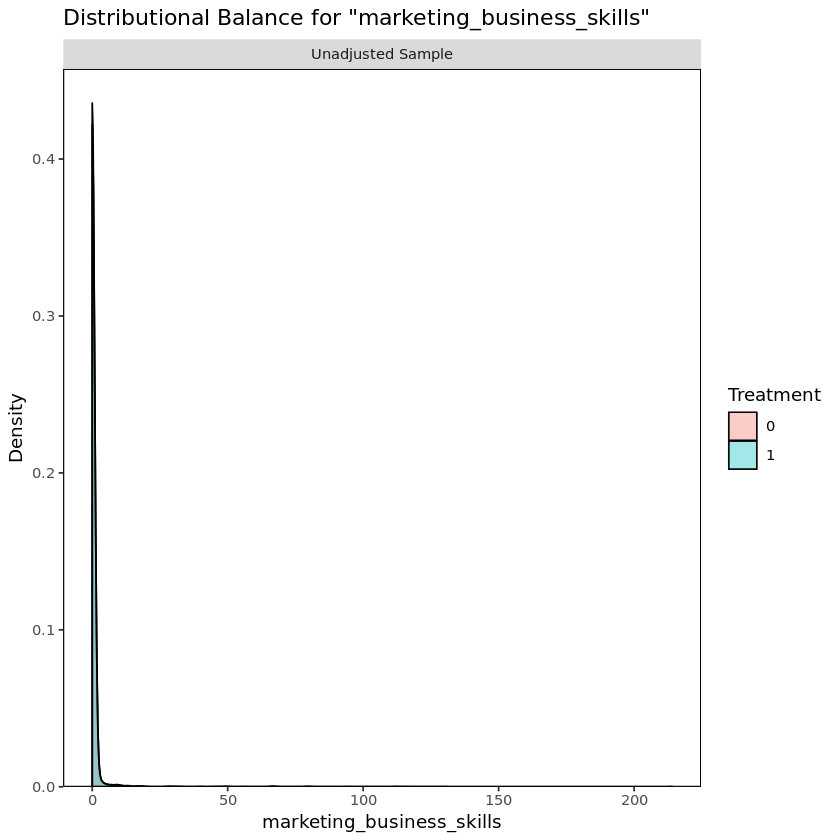

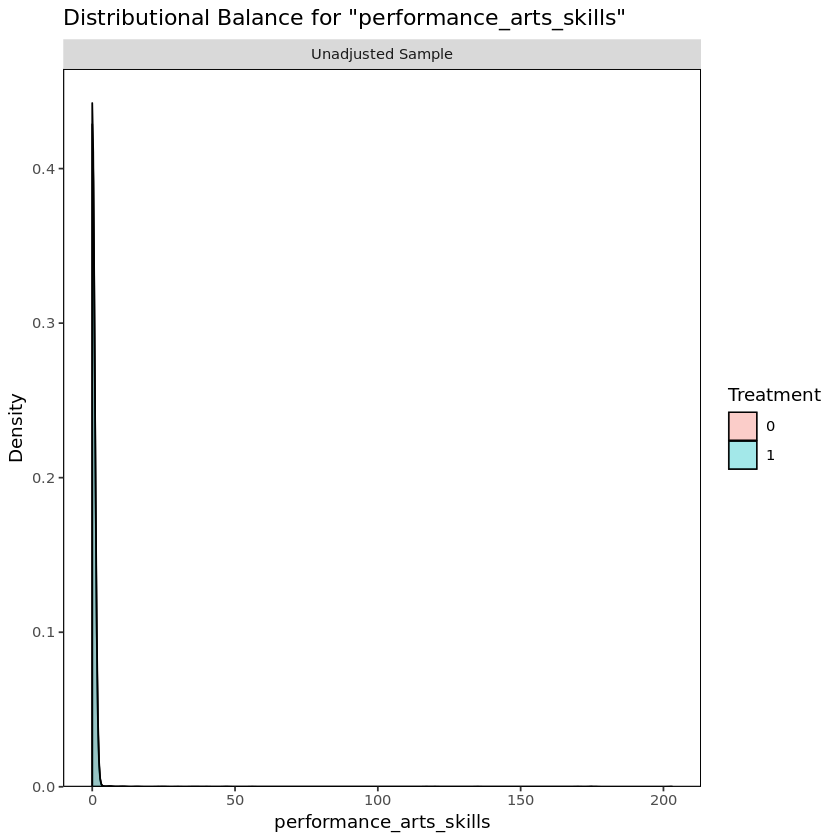

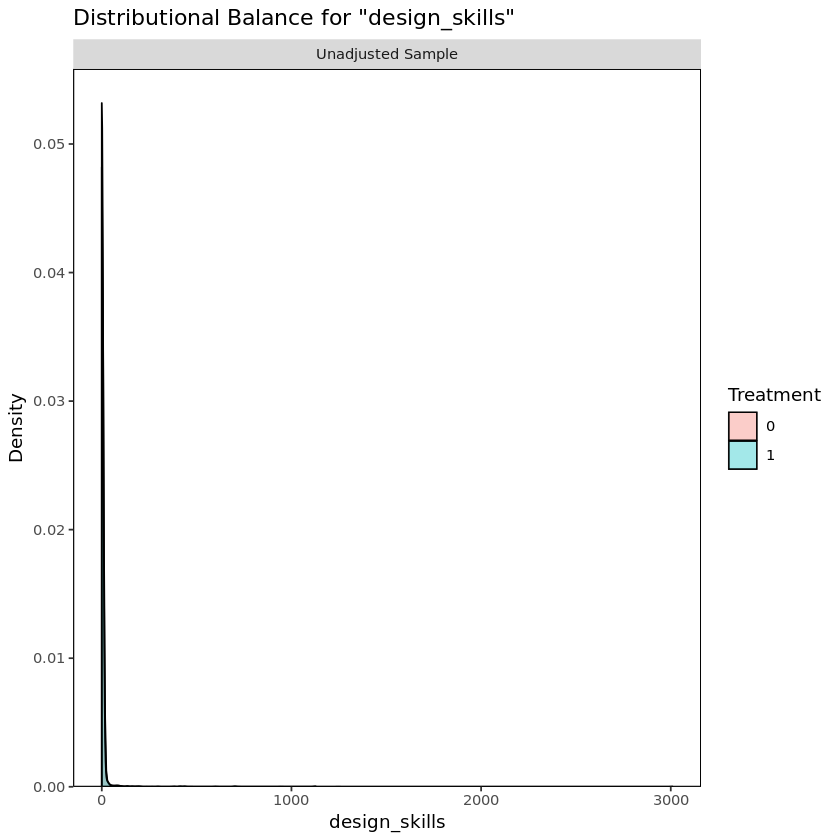

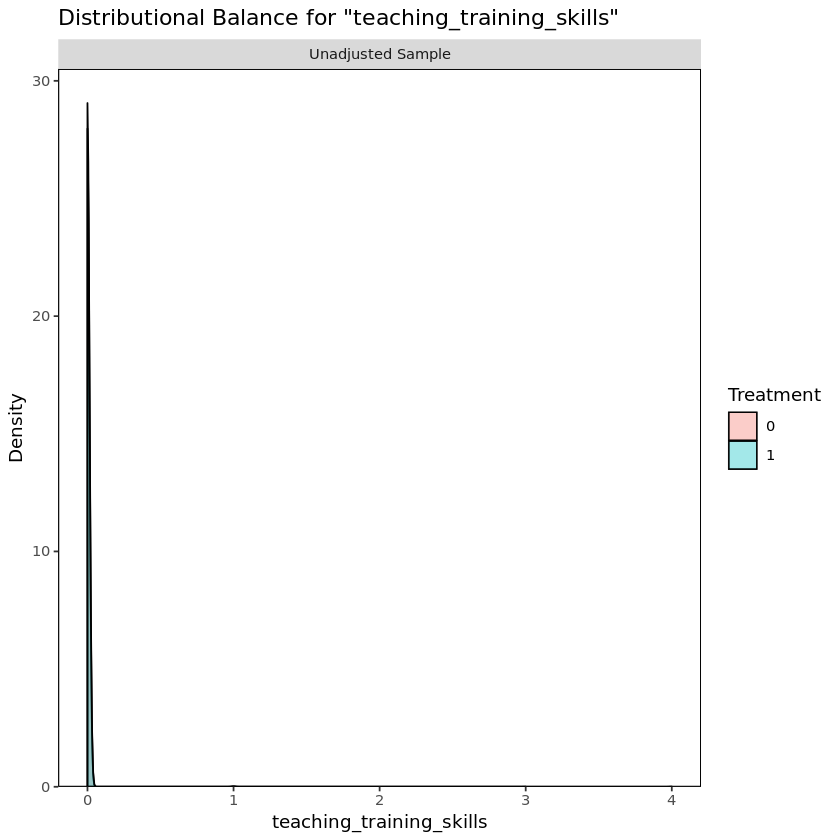

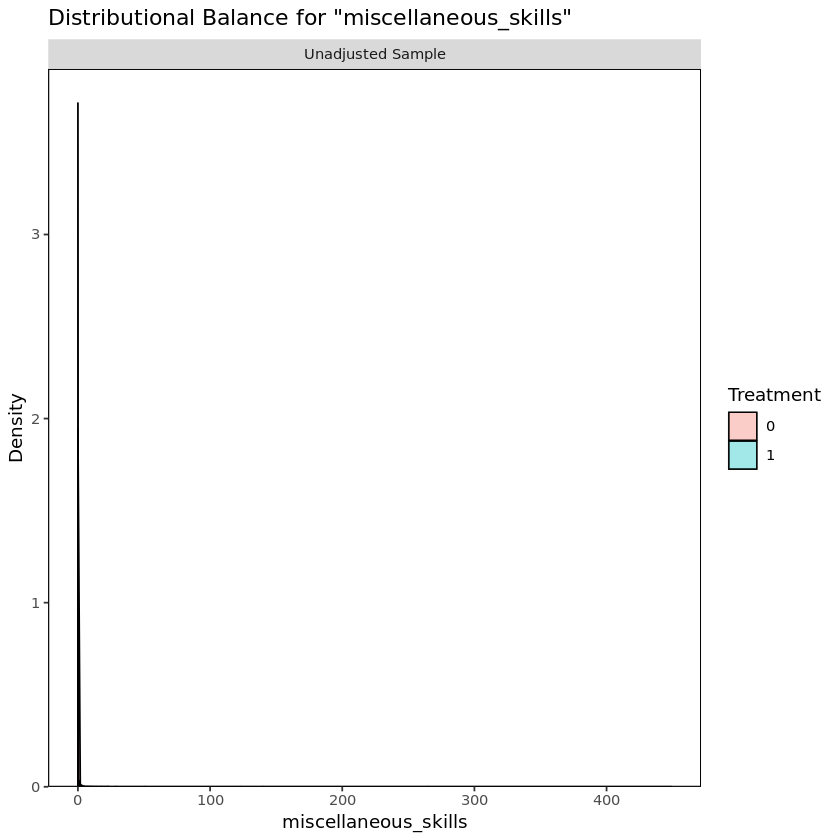

ERROR: Error: "general_skills_certifications" is not the name of an available covariate.


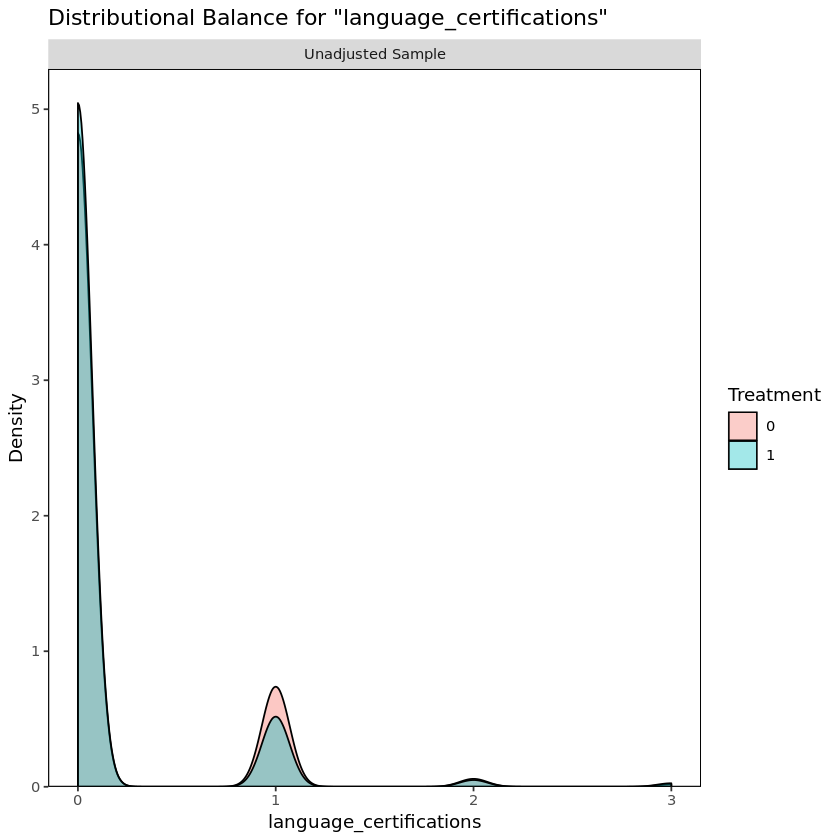

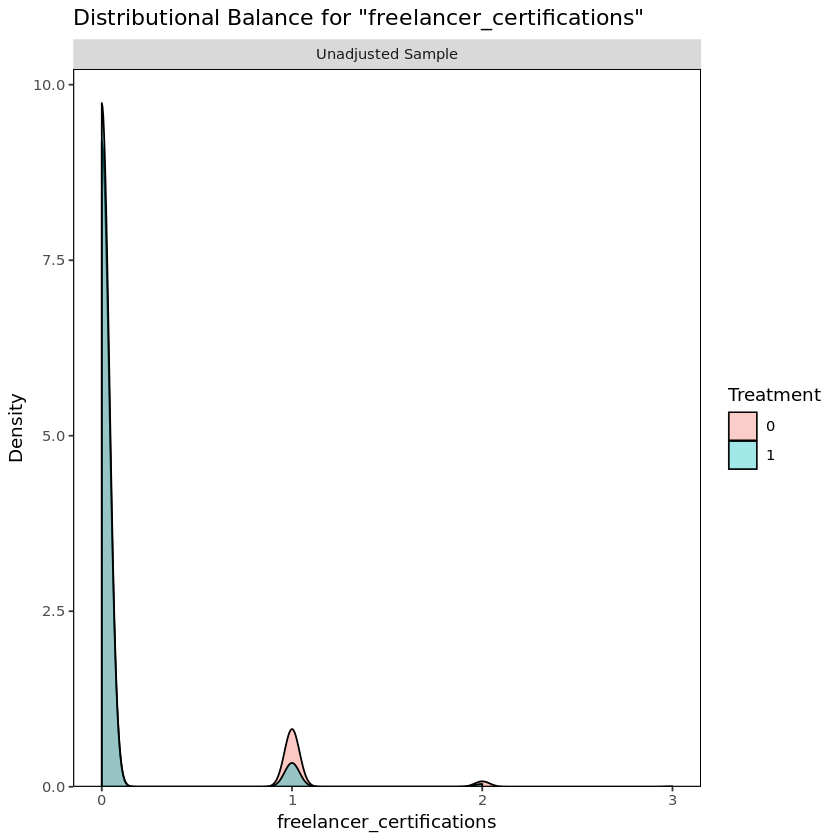

In [ ]:
# covariate balance plots

covariates = c('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_budget', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_payment_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified', 'engineering_skills', 'writing_skills', 'technical_programming_skills', 'language_translation_skills', 'finance_accounting_skills', 'management_skills', 'marketing_business_skills', 'performance_arts_skills', 'design_skills', 'teaching_training_skills', 'miscellaneous_skills', 'language_certifications', 'freelancer_certifications', 'general_skills_certifications', 'programming_certifications')

for (c in covariates) {
    print(bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified + engineering_skills + writing_skills + technical_programming_skills + language_translation_skills + finance_accounting_skills + management_skills + marketing_business_skills + performance_arts_skills + design_skills + teaching_training_skills + miscellaneous_skills + language_certifications + freelancer_certifications + general_skill_certifications + programming_certifications, data=df, var.name=c))
}  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=acc27b92-84be-4130-8026-204943f38189' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>